# Task 1: perceptron

11812804 董正

In [1]:
from perceptron import Perceptron

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

SEED = 24

In [2]:
DIM = 2
MAX_EPOCHS = 2000
LR = 0.01
NUM_POINTS = 200

## Case 1

Normal case.

In [3]:
mu1, mu2, sigma1, sigma2 = 0, 10, 4, 4

p = Perceptron(DIM, MAX_EPOCHS, LR)

x, y = p.gen_dataset(NUM_POINTS, mu1, sigma1, mu2, sigma2)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=SEED)

p.train(x_train, y_train, verbose=100, save_best=True)

Train set shape (320, 2)
2022-02-26 20:08:16.705874 Epoch 100 Train Loss = 5.084
2022-02-26 20:08:16.861458 Epoch 200 Train Loss = 7.159
2022-02-26 20:08:16.960193 Epoch 300 Train Loss = 5.765
2022-02-26 20:08:17.055937 Epoch 400 Train Loss = 6.236
2022-02-26 20:08:17.169947 Epoch 500 Train Loss = 5.558
2022-02-26 20:08:17.343482 Epoch 600 Train Loss = 5.867
2022-02-26 20:08:17.504054 Epoch 700 Train Loss = 6.252
2022-02-26 20:08:17.591818 Epoch 800 Train Loss = 7.312
2022-02-26 20:08:17.680581 Epoch 900 Train Loss = 5.894
2022-02-26 20:08:17.783308 Epoch 1000 Train Loss = 6.637
2022-02-26 20:08:17.906977 Epoch 1100 Train Loss = 7.005
2022-02-26 20:08:18.011698 Epoch 1200 Train Loss = 6.080
2022-02-26 20:08:18.114421 Epoch 1300 Train Loss = 7.201
2022-02-26 20:08:18.191216 Epoch 1400 Train Loss = 6.810
2022-02-26 20:08:18.282971 Epoch 1500 Train Loss = 6.571
2022-02-26 20:08:18.386693 Epoch 1600 Train Loss = 6.302
2022-02-26 20:08:18.510340 Epoch 1700 Train Loss = 7.270
2022-02-26 20:0

In [4]:
y_pred = p.forward(x_test)

print("accuracy = %.3f" % metrics.accuracy_score(y_test, y_pred))
print("precision = %.3f" % metrics.precision_score(y_test, y_pred))
print("recall = %.3f" % metrics.recall_score(y_test, y_pred))
print("f1 = %.3f" % metrics.f1_score(y_test, y_pred))

Test set shape (80, 2)
accuracy = 0.988
precision = 1.000
recall = 0.977
f1 = 0.989


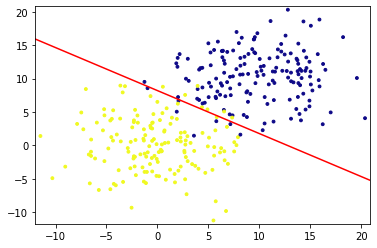

In [5]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=8, cmap="plasma")

x_plot = np.linspace(-100, 100, 100)
y_plot = (-p.w[0] * x_plot - p.b) / p.w[1]
plt.xlim(np.min(x_train[:, 0]) - 0.5, np.max(x_train[:, 0]) + 0.5)
plt.ylim(np.min(x_train[:, 1]) - 0.5, np.max(x_train[:, 1]) + 0.5)
plt.plot(x_plot, y_plot, c="red");

## Case 2

The means of the two Gaussians are too close.

Here we set both of their average values as 0.

In [6]:
mu1, mu2, sigma1, sigma2 = 0, 0, 0.5, 1

p = Perceptron(DIM, MAX_EPOCHS, LR)

x, y = p.gen_dataset(NUM_POINTS, mu1, sigma1, mu2, sigma2)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=SEED)

p.train(x_train, y_train, verbose=100, save_best=True)

Train set shape (320, 2)
2022-02-26 20:08:19.677802 Epoch 100 Train Loss = 1.847
2022-02-26 20:08:19.882958 Epoch 200 Train Loss = 1.922
2022-02-26 20:08:20.097947 Epoch 300 Train Loss = 1.643
2022-02-26 20:08:20.287444 Epoch 400 Train Loss = 1.781
2022-02-26 20:08:20.481924 Epoch 500 Train Loss = 2.032
2022-02-26 20:08:20.673412 Epoch 600 Train Loss = 1.753
2022-02-26 20:08:20.847946 Epoch 700 Train Loss = 1.912
2022-02-26 20:08:21.023476 Epoch 800 Train Loss = 1.848
2022-02-26 20:08:21.240404 Epoch 900 Train Loss = 1.784
2022-02-26 20:08:21.446146 Epoch 1000 Train Loss = 1.443
2022-02-26 20:08:21.658585 Epoch 1100 Train Loss = 1.894
2022-02-26 20:08:22.023401 Epoch 1200 Train Loss = 1.936
2022-02-26 20:08:22.194943 Epoch 1300 Train Loss = 1.655
2022-02-26 20:08:22.388426 Epoch 1400 Train Loss = 1.608
2022-02-26 20:08:22.565952 Epoch 1500 Train Loss = 1.901
2022-02-26 20:08:22.741482 Epoch 1600 Train Loss = 1.677
2022-02-26 20:08:22.926986 Epoch 1700 Train Loss = 1.855
2022-02-26 20:0

In [7]:
y_pred = p.forward(x_test)

print("accuracy = %.3f" % metrics.accuracy_score(y_test, y_pred))
print("precision = %.3f" % metrics.precision_score(y_test, y_pred))
print("recall = %.3f" % metrics.recall_score(y_test, y_pred))
print("f1 = %.3f" % metrics.f1_score(y_test, y_pred))

Test set shape (80, 2)
accuracy = 0.537
precision = 0.595
recall = 0.500
f1 = 0.543


Accuracy is around 0.5.

From the figure below we can see that the perceptron cannot classify them well because their average are too close, probably any line that passes $(0, 0)$ can acheive 0.5 accuracy.

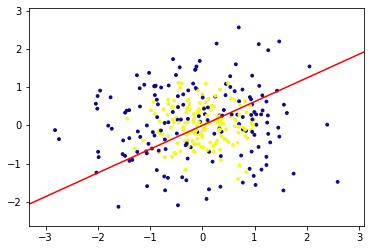

In [8]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=8, cmap="plasma")

x_plot = np.linspace(-100, 100, 100)
y_plot = (-p.w[0] * x_plot - p.b) / p.w[1]
plt.xlim(np.min(x_train[:, 0]) - 0.5, np.max(x_train[:, 0]) + 0.5)
plt.ylim(np.min(x_train[:, 1]) - 0.5, np.max(x_train[:, 1]) + 0.5)
plt.plot(x_plot, y_plot, c="red");

## Case 3

Variance is too high.

In [9]:
mu1, mu2, sigma1, sigma2 = 0, 10, 15, 15

p = Perceptron(DIM, MAX_EPOCHS, LR)

x, y = p.gen_dataset(NUM_POINTS, mu1, sigma1, mu2, sigma2)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=SEED)

p.train(x_train, y_train, verbose=100, save_best=True)

Train set shape (320, 2)
2022-02-26 20:08:24.049399 Epoch 100 Train Loss = 336.996
2022-02-26 20:08:24.234903 Epoch 200 Train Loss = 348.657
2022-02-26 20:08:24.390487 Epoch 300 Train Loss = 314.307
2022-02-26 20:08:24.566018 Epoch 400 Train Loss = 331.098
2022-02-26 20:08:24.718638 Epoch 500 Train Loss = 328.396
2022-02-26 20:08:24.856066 Epoch 600 Train Loss = 317.205
2022-02-26 20:08:25.002672 Epoch 700 Train Loss = 340.828
2022-02-26 20:08:25.175806 Epoch 800 Train Loss = 339.375
2022-02-26 20:08:25.330945 Epoch 900 Train Loss = 322.206
2022-02-26 20:08:25.468534 Epoch 1000 Train Loss = 312.918
2022-02-26 20:08:25.604170 Epoch 1100 Train Loss = 359.682
2022-02-26 20:08:25.756762 Epoch 1200 Train Loss = 330.359
2022-02-26 20:08:25.897387 Epoch 1300 Train Loss = 311.321
2022-02-26 20:08:26.044030 Epoch 1400 Train Loss = 266.221
2022-02-26 20:08:26.184661 Epoch 1500 Train Loss = 406.724
2022-02-26 20:08:26.303560 Epoch 1600 Train Loss = 295.122
2022-02-26 20:08:26.445737 Epoch 1700 Tr

In [10]:
y_pred = p.forward(x_test)

print("accuracy = %.3f" % metrics.accuracy_score(y_test, y_pred))
print("precision = %.3f" % metrics.precision_score(y_test, y_pred))
print("recall = %.3f" % metrics.recall_score(y_test, y_pred))
print("f1 = %.3f" % metrics.f1_score(y_test, y_pred))

Test set shape (80, 2)
accuracy = 0.650
precision = 0.735
recall = 0.568
f1 = 0.641


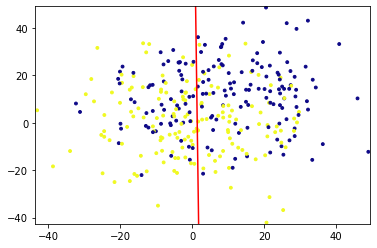

In [11]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=8, cmap="plasma")

x_plot = np.linspace(-1000, 1000, 100)
y_plot = (-p.w[0] * x_plot - p.b) / p.w[1]
plt.xlim(np.min(x_train[:, 0]) - 0.5, np.max(x_train[:, 0]) + 0.5)
plt.ylim(np.min(x_train[:, 1]) - 0.5, np.max(x_train[:, 1]) + 0.5)
plt.plot(x_plot, y_plot, c="red");